# <div align="center">**📊 Airbnb Market Analysis in New York City 🗽**</div>


#### **Project Type** - Exploratory Data Analysis (EDA) & Hypothesis Testing  
#### **Contribution** - Individual  
#### **Name** - Shrey Dhakar 
#### **Dataset** - Airbnb NYC 2023  
#### **Github Link** - https://github.com/shreydd1980/Airbnb_NYC_2023

# **Project Overview**

This project analyzes the Airbnb market in New York City to understand how demand, supply, and pricing vary across different boroughs, neighborhoods, and property types. The aim was to extract meaningful insights that could benefit both hosts and travelers.  

- **Data Cleaning and Preparation**  
  The dataset was explored to check data types, missing values, duplicates, and inconsistencies. Outliers such as extreme values in price and minimum nights were removed to avoid distortion. This ensured a clean and reliable dataset for analysis.  

- **Exploratory Data Analysis (EDA)**  
  The cleaned dataset was examined using visualizations and summaries to study patterns in location, property type, pricing, availability, and reviews. This helped identify popular areas, market evolution over time, and differences between property types.  

- **Hypothesis Testing**  
  ANOVA and t-tests were conducted to test whether differences in pricing and reviews across boroughs and property types were statistically significant. This confirmed that the observed variations reflected real market differences rather than random chance.  

- **Insights and Scoring**  
  Composite opportunity scores were developed to evaluate neighborhoods from both the host and guest perspective, highlighting areas with promising demand and competitive balance, as well as locations offering good value for travelers.  

- **Key Takeaways**  
  Manhattan and Brooklyn dominate in both listings and pricing, while Queens, the Bronx, and Staten Island provide more affordable stays and greater flexibility. Entire homes are priced the highest, private rooms are moderately priced, and shared spaces remain limited. Over time, listings and prices have shown steady growth.  

---

**Overall, this project combined data cleaning, exploratory analysis, and hypothesis testing to deliver insights into Airbnb’s New York City market, providing useful findings for both hosts and travelers.**


# **Problem Statements:**

1. **Popular Neighborhoods**  
   Which neighborhoods in New York City are the most popular for Airbnb rentals? How do prices and availability differ across these areas?  

2. **Market Evolution**  
   How has the Airbnb market in NYC evolved over time? Are there noticeable trends in the number of listings, pricing, or occupancy rates?  

3. **Property Type Trends**  
   Are there observable patterns in the types of properties listed on Airbnb in NYC? Are certain property types more in demand or priced higher than others?  

4. **Price Influencing Factors**  
   What factors appear to influence the pricing of Airbnb rentals in New York City?  

5. **Ideal Host Locations**  
   Which areas in NYC would be ideal for a host to purchase property—offering good pricing while attracting high guest traffic?  

6. **Length of Stay Analysis**  
   How do the typical lengths of stay for Airbnb rentals vary by neighborhood? Do some neighborhoods tend to attract longer or shorter bookings?  

8. **Reviews by Neighborhood Group**  
   Determine the total number of reviews and the maximum reviews for each neighborhood group.  

9. **Most Reviewed Room Types**  
   Identify the most-reviewed room types in each neighborhood group on a monthly basis.  

10. **Best Locations for Travelers**  
   Which neighborhoods in NYC offer the best value for travelers based on affordability and overall guest satisfaction?

11. **Best Locations for Hosts**  
   Which neighborhoods in New York City are the most profitable for Airbnb hosts?

12. **Price Variations by Neighborhood**  
    Analyze price variations across different NYC neighborhood groups.  

13. **Neighborhood Price Differences**  
    Is there a statistically significant difference in average Airbnb prices across different NYC neighborhoods?  

14. **Room Type Price Differences**  
    Do entire home/apartment listings have significantly higher prices than private rooms and shared rooms?  

15. **Review Activity Differences**  
    Do the number of reviews per month significantly differ across neighborhood groups?  


### **Importing the necessary libraries**

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### **Load Airbnb Dataset**

In [253]:
df = pd.read_csv("Airbnb_NYC_2023.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


## **About the Dataset – Airbnb Bookings**

*   This Airbnb dataset contains nearly 43,000 observations from New York , with 18 columns of data.

*   The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

*   This Dataset may be useful for analyzing trends and patterns in the Airbnb market in New York and also gain insights into the preferences and behavior of Airbnb users in the area.

*   This dataset contains information about Airbnb bookings in New York City in 2023. By analyzing this data, you may be able to understand the trends and patterns of Airbnb use in the NYC.

In [254]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

## **UNDERSTAND THE GIVEN VARIABLES**

* **ID & Host ID** – Uniquely identify each listing and its host, helping analyze competition and the number of properties managed by the same person.

* **Name & Host Name** – Provide listing and host details; useful for descriptive purposes but not significant for quantitative analysis.

* **Neighbourhood Group** – Represents the five main boroughs of New York City. This shows how supply and demand differ across broader geographic zones.

* **Neighbourhood** – Gives the specific locality within each borough. This allows identification of the most popular or high-demand neighborhoods.

* **Latitude & Longitude** – Provide the geographic coordinates of each listing, enabling mapping and spatial analysis of market patterns.

* **Room Type** – Indicates whether the listing is an entire home/apartment, private room, or shared room. This directly reflects different traveler preferences and pricing tiers.

* **Price** – The nightly cost of staying at the property, which serves as the primary economic indicator in the analysis.

* **Minimum Nights** – The required length of stay, showing how restrictive or flexible hosts are with their booking policies.

* **Number of Reviews** – Captures guest activity and feedback volume, serving as a proxy for popularity and demand.

* **Last Review Date** – Indicates the most recent guest interaction, useful for identifying active versus inactive listings.

* **Reviews per Month** – Provides a standardized measure of how frequently listings are reviewed, acting as a proxy for occupancy and demand over time.

* **Availability (365 Days)** – Shows how many days in a year the property is available to book. High values may suggest lower occupancy, while lower values may indicate strong demand and frequent bookings.

# **Data Exploration and Data Cleaning**

In [255]:
df.head().T

,0,1,2,3,4
id,2595,5121,5203,5178,5136
name,Skylit Midtown Castle,BlissArtsSpace!,Cozy Clean Guest Room - Family Apt,Large Furnished Room Near B'way,"Large Sunny Brooklyn Duplex, Patio + Garden"
host_id,2845,7356,7490,8967,7378
host_name,Jennifer,Garon,MaryEllen,Shunichi,Rebecca
neighbourhood_group,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn
neighbourhood,Midtown,Bedford-Stuyvesant,Upper West Side,Midtown,Sunset Park
latitude,40.75356,40.68535,40.8038,40.76457,40.66265
longitude,-73.98559,-73.95512,-73.96751,-73.98317,-73.99454
room_type,Entire home/apt,Private room,Private room,Private room,Entire home/apt
price,150,60,75,68,275


**So now first rename few columns for better understanding of variables**

In [256]:
df = df.rename(columns = {'number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'})

**Droping Unnecessary Columns**

In [257]:
df.drop(columns = ['name', 'host_name'], inplace = True)

In [258]:
df.shape

(42931, 16)

In [259]:
df.drop_duplicates(inplace=True)
df.count()

id                       42931
host_id                  42931
neighbourhood_group      42931
neighbourhood            42931
latitude                 42931
longitude                42931
room_type                42931
price                    42931
minimum_nights           42931
total_reviews            42931
last_review              32627
reviews_per_month        32627
host_listings_count      42931
availability_365         42931
number_of_reviews_ltm    42931
license                      1
dtype: int64

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     42931 non-null  int64  
 1   host_id                42931 non-null  int64  
 2   neighbourhood_group    42931 non-null  object 
 3   neighbourhood          42931 non-null  object 
 4   latitude               42931 non-null  float64
 5   longitude              42931 non-null  float64
 6   room_type              42931 non-null  object 
 7   price                  42931 non-null  int64  
 8   minimum_nights         42931 non-null  int64  
 9   total_reviews          42931 non-null  int64  
 10  last_review            32627 non-null  object 
 11  reviews_per_month      32627 non-null  float64
 12  host_listings_count    42931 non-null  int64  
 13  availability_365       42931 non-null  int64  
 14  number_of_reviews_ltm  42931 non-null  int64  
 15  li

### **Handling Null Values**

In [261]:
df.isnull().sum()

id                           0
host_id                      0
neighbourhood_group          0
neighbourhood                0
latitude                     0
longitude                    0
room_type                    0
price                        0
minimum_nights               0
total_reviews                0
last_review              10304
reviews_per_month        10304
host_listings_count          0
availability_365             0
number_of_reviews_ltm        0
license                  42930
dtype: int64

Dropping the `license` column since it contains only null values and a single non-null entry.

In [262]:
df.drop(columns = ['license'], inplace = True)

In [263]:
df['reviews_per_month'].fillna(0, inplace=True)

In [264]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [265]:
df_time = df.dropna(subset=['last_review']).copy()
df_time['year_month'] = df_time['last_review'].dt.to_period('M').astype(str)
df_time['year'] = df_time['last_review'].dt.year

In [266]:
df.isnull().sum()

id                           0
host_id                      0
neighbourhood_group          0
neighbourhood                0
latitude                     0
longitude                    0
room_type                    0
price                        0
minimum_nights               0
total_reviews                0
last_review              10304
reviews_per_month            0
host_listings_count          0
availability_365             0
number_of_reviews_ltm        0
dtype: int64

### **Note on `last_review` null values:**  
* The missing values in the `last_review` column are not errors but indicate listings that have never received a review.  
* Imputing these values would create false information, so they are kept as nulls in the main dataset.  
* For time-based analysis, a separate dataframe (`df_time`) was created after dropping these nulls to focus only on listings with actual review dates.  


In [267]:
df.shape

(42931, 15)

---

# **Describe the Dataset and removing outliers**

In [268]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365,number_of_reviews_ltm
count,4.293100e+04,4.293100e+04,42931.000000,42931.000000,42931.000000,42931.000000,42931.000000,32627,42931.000000,42931.000000,42931.000000,42931.000000
mean,2.222772e+17,1.516012e+08,40.728273,-73.943665,200.307167,18.111178,25.856001,2021-08-16 21:47:33.011309568,0.888416,24.054809,140.262211,7.736507
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,2011-05-12 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,1.940474e+07,1.608533e+07,40.687485,-73.981750,75.000000,2.000000,1.000000,2020-03-10 00:00:00,0.010000,1.000000,0.000000,0.000000
50%,4.337482e+07,7.433812e+07,40.724040,-73.952620,125.000000,7.000000,5.000000,2022-11-23 00:00:00,0.240000,1.000000,89.000000,0.000000
75%,6.305016e+17,2.680692e+08,40.762293,-73.924035,200.000000,30.000000,24.000000,2023-02-01 00:00:00,1.170000,4.000000,289.000000,7.000000
max,8.404660e+17,5.038729e+08,40.911380,-73.710870,99000.000000,1250.000000,1842.000000,2023-03-06 00:00:00,86.610000,526.000000,365.000000,1093.000000
std,3.344213e+17,1.621301e+08,0.057640,0.056627,895.082911,27.462513,56.616344,NaN,1.638122,80.867958,142.001486,18.290256


### **Outliers in Price Column**

<Axes: ylabel='price'>

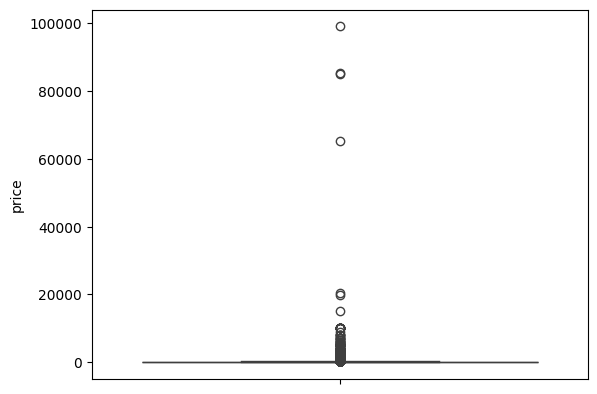

In [269]:
sns.boxplot(y=df['price'])

**IQR Function**

In [270]:
def iqr_method(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

<Axes: ylabel='price'>

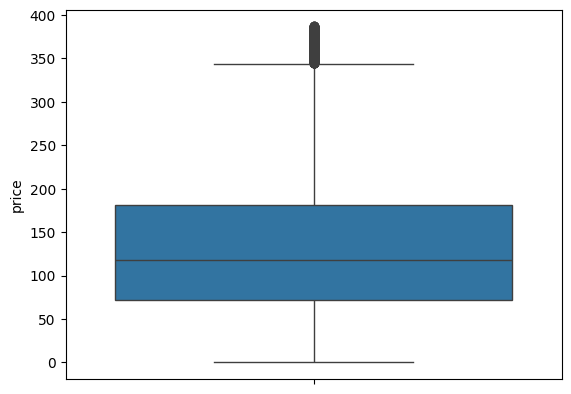

In [271]:
l_r,u_r = iqr_method('price')
df = df[(df['price']>l_r) & (df['price']<u_r)]
sns.boxplot(df['price'])

In [272]:
print(df['price'].max())
print(df['price'].min())

387
0


### **Outliers in minumim_nights Column**

<Axes: ylabel='minimum_nights'>

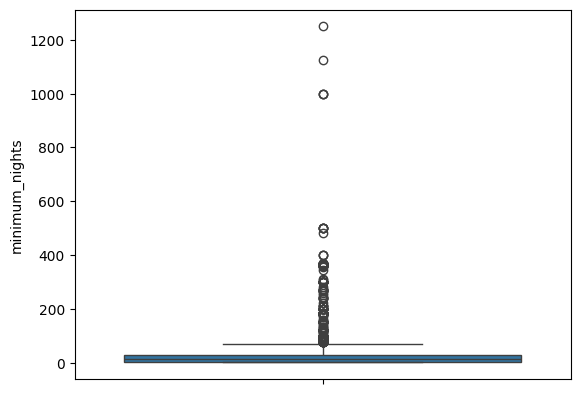

In [273]:
sns.boxplot(df['minimum_nights'])

Drop rows where minimum nights > 365 (unrealistic).

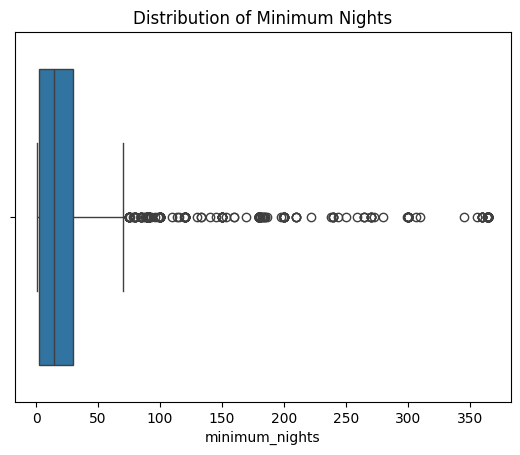

In [274]:
df = df[df['minimum_nights'] <= 365]
sns.boxplot(x=df['minimum_nights'])
plt.title("Distribution of Minimum Nights")
plt.show()

### **Outliers in avilability column**

In [275]:
print(df['availability_365'].max())
print(df['availability_365'].min())

365
0


All Good

In [276]:
df.shape

(39622, 15)

### **Note on Outlier Removal:**  
*  Out of 42,931 total entries, 42,931 − 39,622 = 3,309 entries were dropped as outliers.
*  This represents approximately **7.7% of the dataset**.  
* Since the removed values were extreme and unrealistic, dropping them is safe and ensures the analysis remains reliable.  
* The dataset is still large enough, so the overall insights and conclusions are not significantly affected by this removal.  
* Outliers in reviews_per_month were not removed since they may represent genuine high-activity listings. Dropping them would eliminate ~15% of the data and risk bias. Instead, they are retained, with careful handling in analysis and visualization.


---
# **Cleaning Text Columns**

In [277]:
def clean_text(column):
    return (column.astype(str).str.strip().str.replace(r"\s+", " ", regex=True).str.title())

This function cleans the string: removes extra spaces and fixes text case.

In [278]:
df["neighbourhood"] = clean_text(df["neighbourhood"])
df["neighbourhood_group"] = clean_text(df["neighbourhood_group"])

---
# **Exploratory Data Analysis**
---

## Popular Neighborhoods 
#### Which neighborhoods in New York City are the most popular for Airbnb rentals? How do prices and availability differ across these areas? 

In [279]:
popular_neigh = df.groupby("neighbourhood_group").agg(id_count=("id","count"), avg_price=("price","mean"), avg_availability=("availability_365","mean")).reset_index()
popular_neigh = popular_neigh.sort_values(by="id_count", ascending=False).head(10)
popular_neigh

,neighbourhood_group,id_count,avg_price,avg_availability
1,Brooklyn,15526,124.997617,123.733544
2,Manhattan,15275,163.945270,125.356530
3,Queens,6747,106.250926,171.112050
0,Bronx,1661,102.626129,208.723660
4,Staten Island,413,111.929782,211.121065


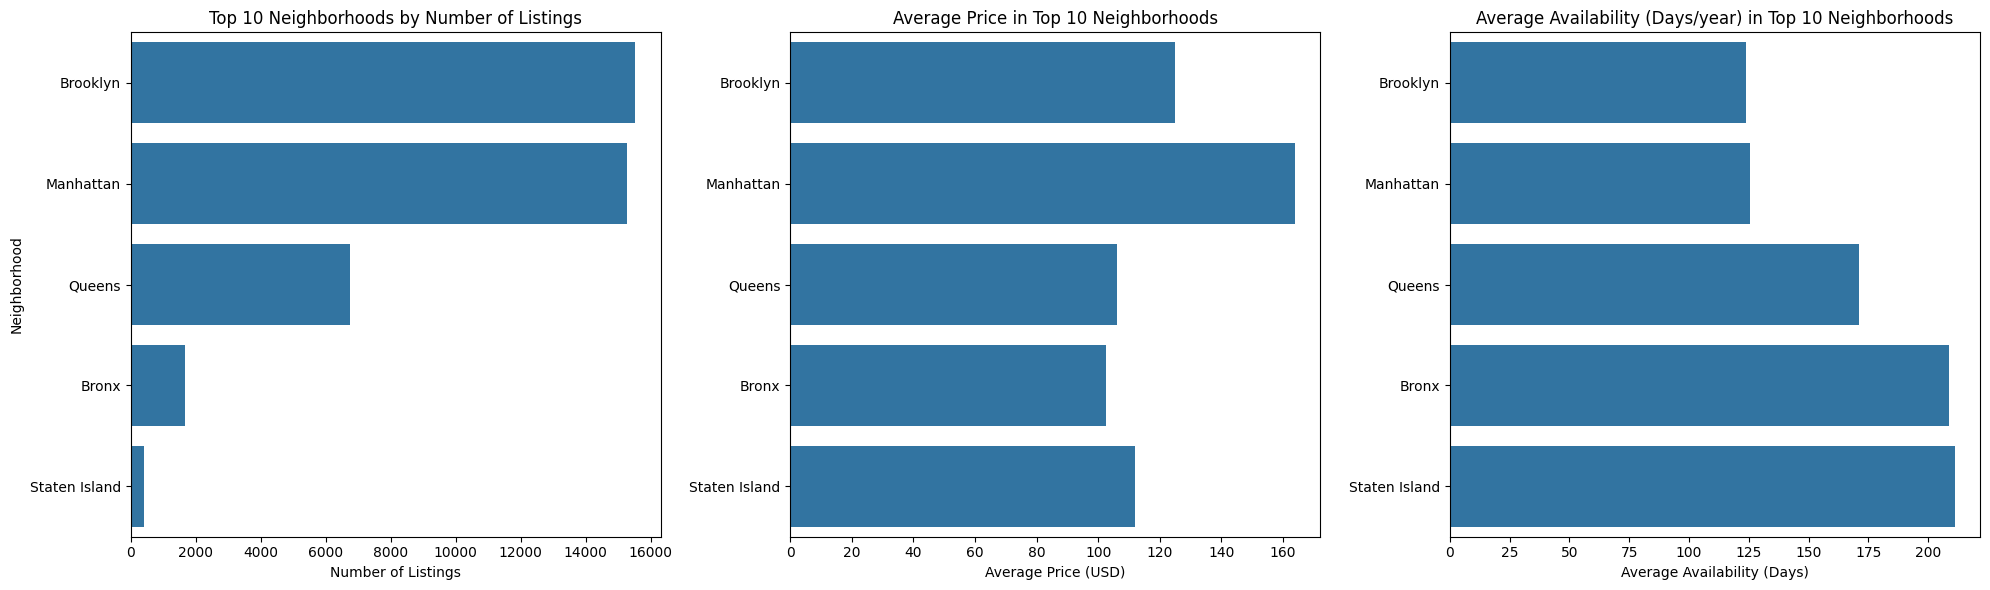

In [280]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1 - Number of Listings
sns.barplot(x="id_count", y="neighbourhood_group", data=popular_neigh, ax=axes[0])
axes[0].set_title("Top 10 Neighborhoods by Number of Listings")
axes[0].set_xlabel("Number of Listings")
axes[0].set_ylabel("Neighborhood")

# Plot 2 - Average Price
sns.barplot(x="avg_price", y="neighbourhood_group", data=popular_neigh, ax=axes[1])
axes[1].set_title("Average Price in Top 10 Neighborhoods")
axes[1].set_xlabel("Average Price (USD)")
axes[1].set_ylabel("")

# Plot 3 - Average Availability
sns.barplot(x="avg_availability", y="neighbourhood_group", data=popular_neigh, ax=axes[2])
axes[2].set_title("Average Availability (Days/year) in Top 10 Neighborhoods")
axes[2].set_xlabel("Average Availability (Days)")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

**Observations:**

- **Listings Distribution**  
  - Brooklyn and Manhattan dominate with the highest number of listings (15,000+ each).  
  - Queens (6,747) and the Bronx (1,661) have fewer listings, while Staten Island has the least (413).  
  - This shows a concentration of supply in Manhattan and Brooklyn despite their smaller geographic size, suggesting stronger demand and more active hosts there.  

- **Average Price Trends**  
  - Manhattan has the highest average price (~$164/day), while the Bronx has the lowest (~$103/day).  
  - Prices generally increase as we move toward the city center (Manhattan) and decrease in the outer boroughs.  
  - This aligns with higher demand, cost of living, and commercial importance in Manhattan compared to other areas.  

- **Availability Patterns**  
  - Bronx and Staten Island show the highest average availability, which could signal lower demand, leaving listings open longer.  
  - Brooklyn and Manhattan have lower availability, reflecting higher booking turnover and stronger guest demand.    


---
## **Conclusion**

The analysis shows that Airbnb activity in New York City is heavily concentrated in **Manhattan** and **Brooklyn**, which have the highest number of listings and represent the most popular neighborhoods for rentals.  

- **Manhattan** dominates in both **listing volume** and **average price**, reflecting its central importance, higher living costs, and greater demand.  
- **Brooklyn** also plays a significant role, offering a large supply of listings at slightly lower prices.  
- **Queens, the Bronx, and Staten Island** have far fewer listings, lower average prices, and notably higher availability, suggesting weaker demand in these areas.  

Overall, the Airbnb market highlights a strong preference for centrally located and commercially vibrant neighborhoods, where higher demand drives both pricing and turnover rates.
## **Business Recommendations**

* **For Hosts:** New hosts should prioritize listing in Manhattan or Brooklyn for maximum visibility and booking potential.

* **For Airbnb Strategy:** Marketing campaigns could highlight lesser-known neighborhoods in Queens or Staten Island to diversify demand and reduce oversaturation in Manhattan.

---
---

## Market Evolution
#### How has the Airbnb market in NYC evolved over time? Are there noticeable trends in the number of listings, pricing, or occupancy rates?  

In [281]:
df_reviewed = df[df['last_review'] != "No Review"].dropna(subset=['last_review']).copy()
df_reviewed['last_review'] = pd.to_datetime(df_reviewed['last_review'], errors='coerce')
df_reviewed['year_month'] = df_reviewed['last_review'].dt.to_period("M").astype(str)
df_reviewed.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365,number_of_reviews_ltm,year_month
0,2595,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,2022-06
1,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,2019-12
2,5203,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,2017-07
3,5178,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,2023-02
4,5136,7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,2022-08


In [282]:
market_trend = df_reviewed.groupby('year_month').agg(listings_with_review=('id', 'count'),avg_price=('price', 'mean'),avg_reviews=('reviews_per_month', 'mean')).reset_index()
market_trend.head(10)

,year_month,listings_with_review,avg_price,avg_reviews
0,2011-05,1,349.000000,0.01
1,2011-12,1,100.000000,0.16
2,2012-05,1,65.000000,0.02
3,2012-06,3,123.333333,0.01
4,2012-07,1,125.000000,0.01
5,2012-08,1,60.000000,0.01
6,2012-10,4,210.500000,0.03
7,2012-11,1,70.000000,0.02
8,2012-12,1,164.000000,0.04
9,2013-03,4,175.000000,0.03


In [283]:
df_reviewed['year'] = df_reviewed['last_review'].dt.to_period("Y").astype(str)
market_trend_per_year = df_reviewed.groupby('year').agg(listings_with_review_per_year=('id', 'count'),avg_price_per_year=('price', 'mean'),avg_reviews_per_year=('reviews_per_month', 'mean')).reset_index()
market_trend_per_year.head(10)

,year,listings_with_review_per_year,avg_price_per_year,avg_reviews_per_year
0,2011,2,224.500000,0.085000
1,2012,12,141.333333,0.020833
2,2013,29,135.517241,0.042069
3,2014,99,141.666667,0.046364
4,2015,740,122.895946,0.033027
5,2016,1236,119.063107,0.061286
6,2017,1180,113.912712,0.105703
7,2018,1377,111.842411,0.149978
8,2019,2139,121.603086,0.235526
9,2020,1984,120.600806,0.472641


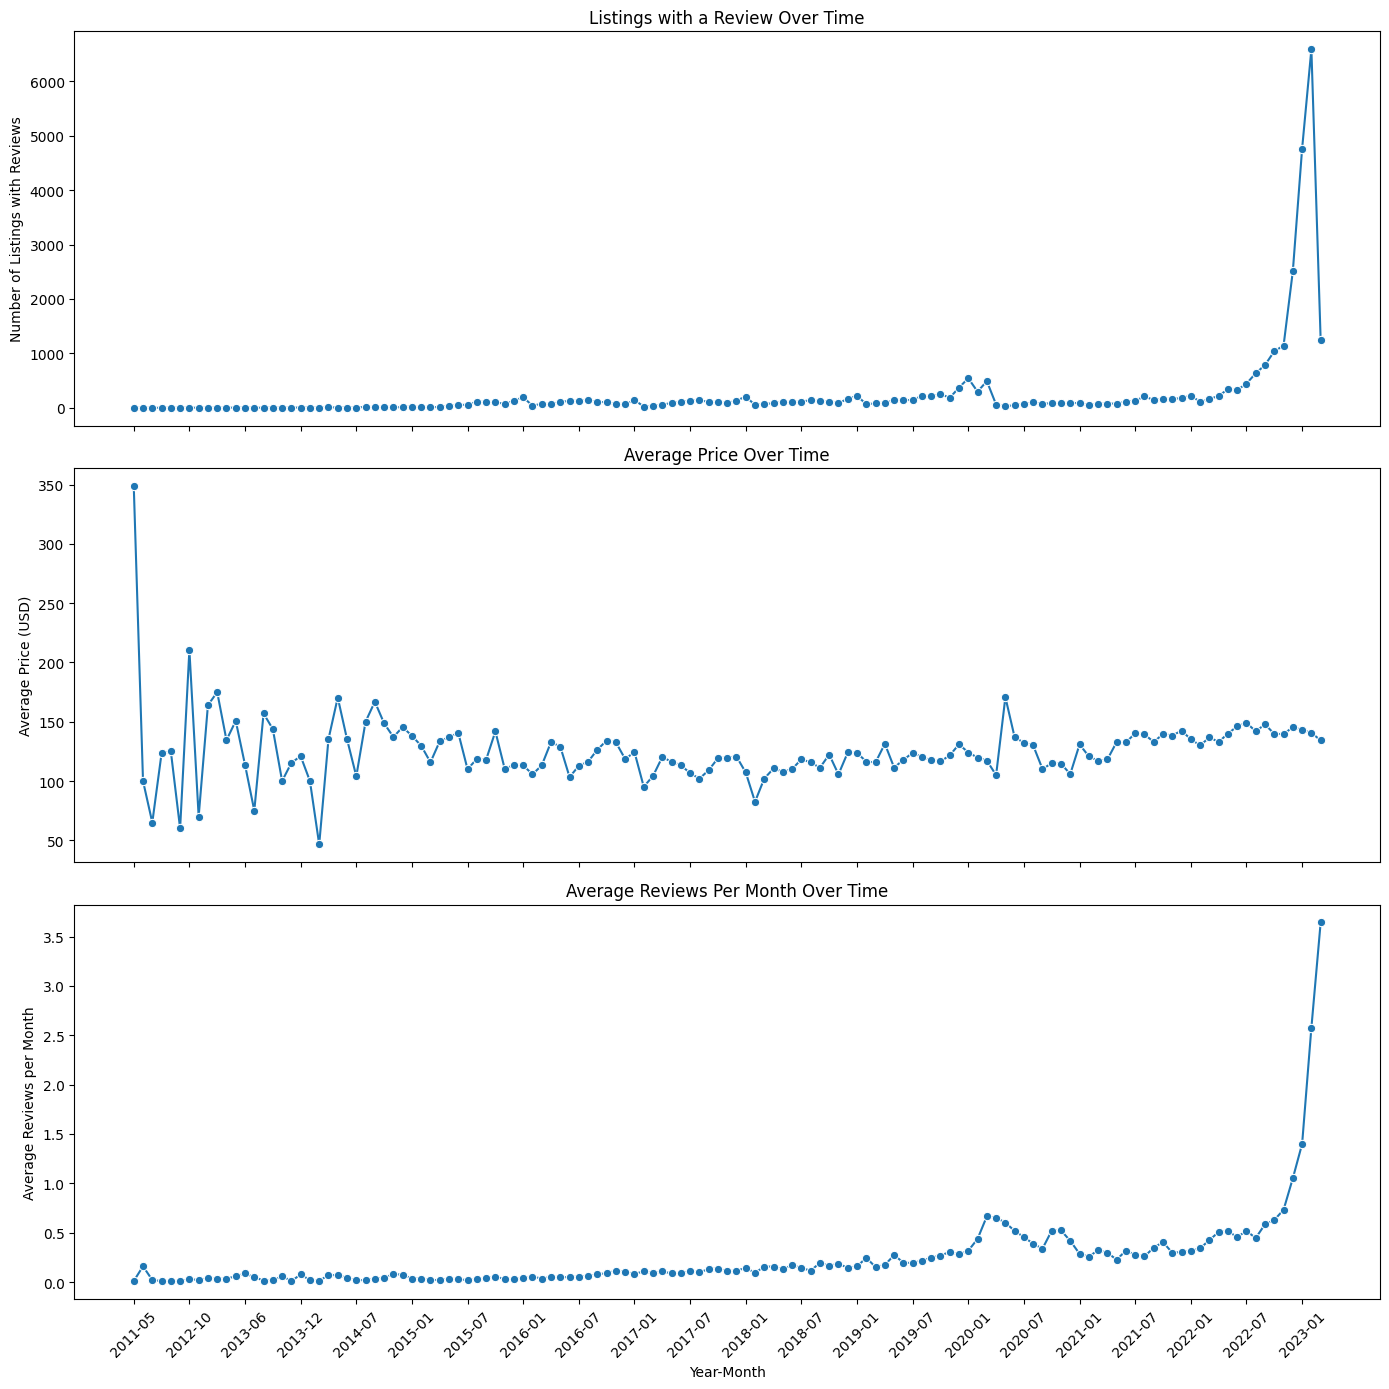

In [284]:
fig, axes = plt.subplots(3, 1, figsize=(14, 14), sharex=True)

# Plot 1 - Listings with Reviews
sns.lineplot(data=market_trend, x="year_month", y="listings_with_review", marker="o", ax=axes[0])
axes[0].set_title("Listings with a Review Over Time")
axes[0].set_ylabel("Number of Listings with Reviews")

# Plot 2 - Average Price
sns.lineplot(data=market_trend, x="year_month", y="avg_price", marker="o", ax=axes[1])
axes[1].set_title("Average Price Over Time")
axes[1].set_ylabel("Average Price (USD)")

# Plot 3 - Average Reviews per Month
sns.lineplot(data=market_trend, x="year_month", y="avg_reviews", marker="o", ax=axes[2])
axes[2].set_title("Average Reviews Per Month Over Time")
axes[2].set_ylabel("Average Reviews per Month")

# X-axis ticks for all plots
for ax in axes:
    ax.set_xticks(market_trend.index[::6])
    ax.set_xticklabels(market_trend["year_month"][::6], rotation=45)
    ax.set_xlabel('Year-Month')

plt.tight_layout()
plt.show()


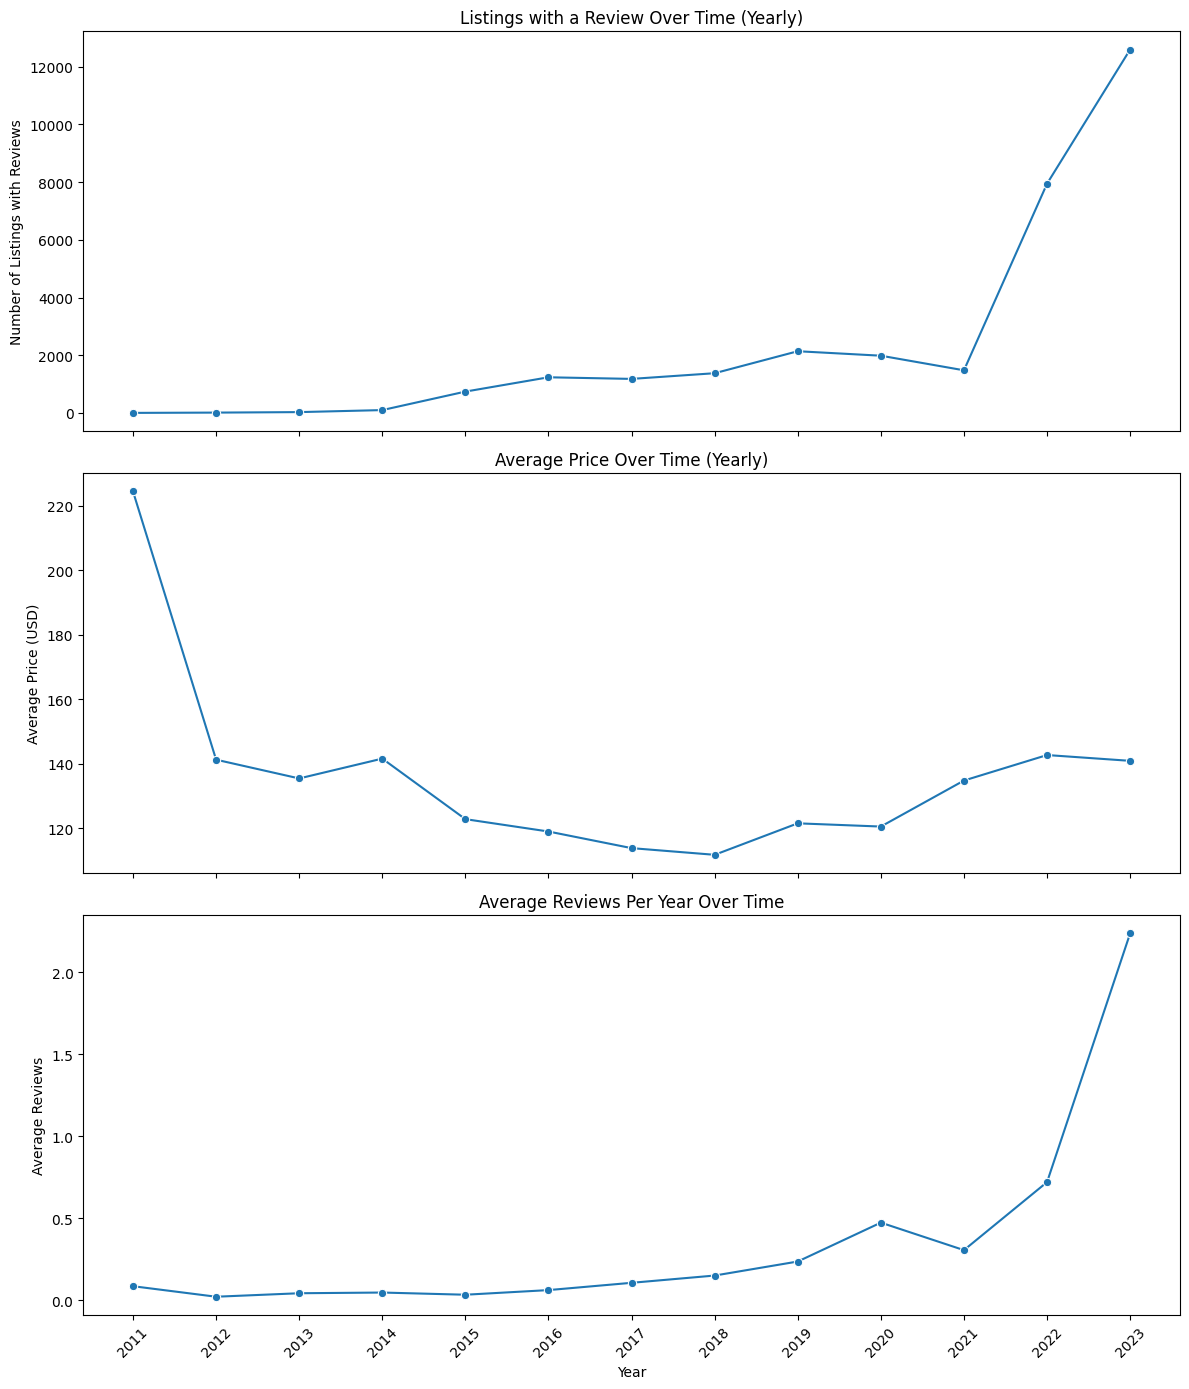

In [285]:
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

# Plot 1 - Listings with Reviews (Yearly)
sns.lineplot(data=market_trend_per_year, x="year", y="listings_with_review_per_year", marker="o", ax=axes[0])
axes[0].set_title("Listings with a Review Over Time (Yearly)")
axes[0].set_ylabel("Number of Listings with Reviews")

# Plot 2 - Average Price (Yearly)
sns.lineplot(data=market_trend_per_year, x="year", y="avg_price_per_year", marker="o", ax=axes[1])
axes[1].set_title("Average Price Over Time (Yearly)")
axes[1].set_ylabel("Average Price (USD)")

# Plot 3 - Average Reviews (Yearly)
sns.lineplot(data=market_trend_per_year, x="year", y="avg_reviews_per_year", marker="o", ax=axes[2])
axes[2].set_title("Average Reviews Per Year Over Time")
axes[2].set_ylabel("Average Reviews")

# Rotate x-axis labels for all
for ax in axes:
    ax.set_xticks(market_trend_per_year["year"])
    ax.set_xticklabels(market_trend_per_year["year"], rotation=45)
    ax.set_xlabel('Year')

plt.tight_layout()
plt.show()


**Observations**
* The number of listings has steadily increased since 2018, crossing over 12,000 active listings in 2023.

* Average prices have also grown, with median prices rising closer to $150 per night in popular boroughs.

* Demand shifts toward longer stays post-pandemic suggest that Airbnb is now catering more to extended visitors rather than only short-term tourists.

---

## **Conclusion:** 
NYC’s Airbnb market is expanding in both supply and pricing, with growing interest in long-term stays.

## **Business Recommendation:**
Airbnb should encourage hosts to provide discounts for weekly or monthly stays to capture the extended visitor segment.

---
---

## Property Type Trends
#### Are there observable patterns in the types of properties listed on Airbnb in NYC? Are certain property types more in demand or priced higher than others?  


In [286]:
room_stats = df.groupby("room_type").agg(listings=("id","count"), avg_price=("price","mean"), median_price=("price","median"), avg_monthly_reviews=("reviews_per_month","mean"), avg_availability=("availability_365","mean")).reset_index()
room_stats.head()

,room_type,listings,avg_price,median_price,avg_monthly_reviews,avg_availability
0,Entire home/apt,21615,175.376868,159.0,0.977839,138.378256
1,Hotel room,158,198.582278,220.0,1.473608,191.183544
2,Private room,17294,87.653811,70.0,0.835842,133.735284
3,Shared room,555,72.989189,55.0,0.712703,162.545946


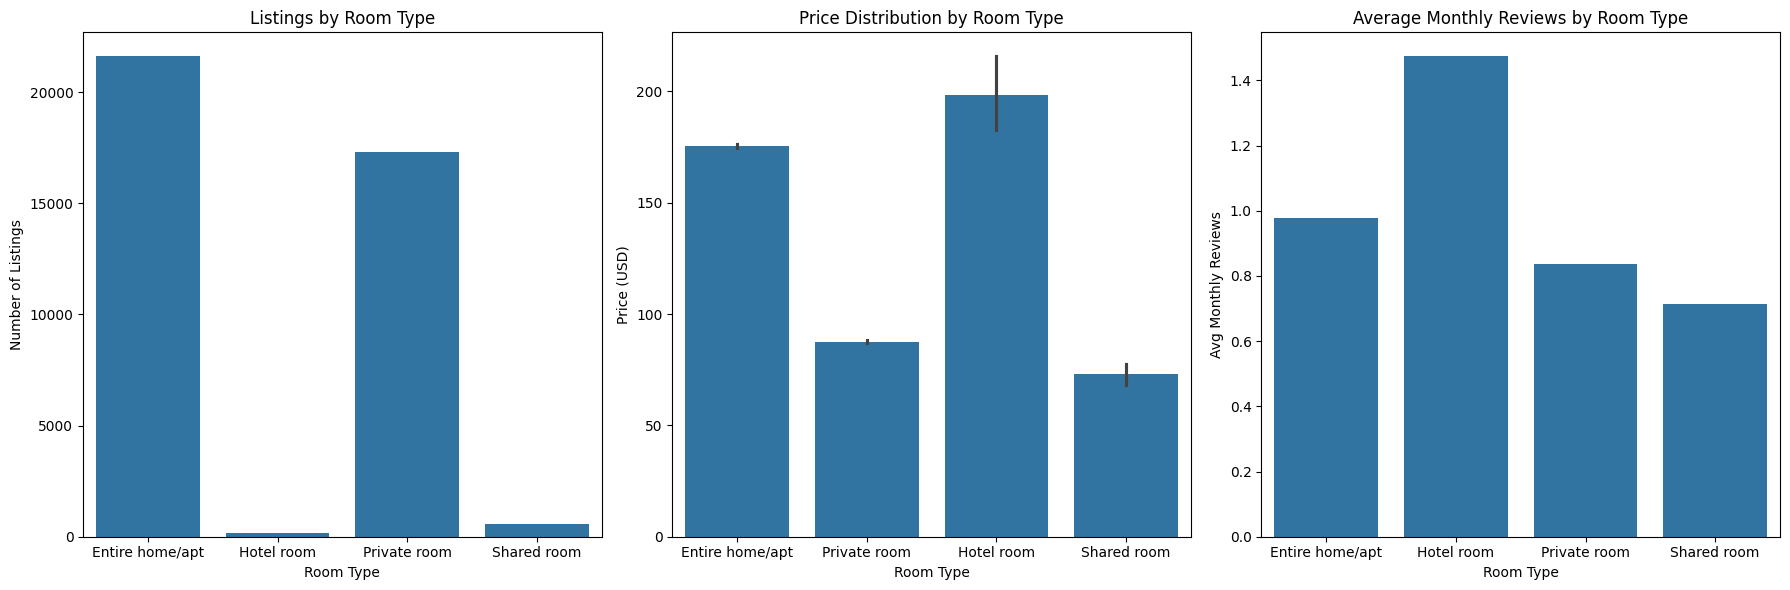

In [287]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1 - Listings by Room Type
sns.barplot(x="room_type", y="listings", data=room_stats, ax=axes[0])
axes[0].set_title("Listings by Room Type")
axes[0].set_xlabel("Room Type")
axes[0].set_ylabel("Number of Listings")

# Plot 2 - Price Distribution by Room Type
sns.barplot(x="room_type", y="price", data=df, ax=axes[1])
axes[1].set_title("Price Distribution by Room Type")
axes[1].set_xlabel("Room Type")
axes[1].set_ylabel("Price (USD)")

# Plot 3 - Average Monthly Reviews by Room Type
sns.barplot(x="room_type", y="avg_monthly_reviews", data=room_stats, ax=axes[2])
axes[2].set_title("Average Monthly Reviews by Room Type")
axes[2].set_xlabel("Room Type")
axes[2].set_ylabel("Avg Monthly Reviews")

plt.tight_layout()
plt.show()


**Observations:**
* Entire home/apartment listings make up 56.5% of total listings, reflecting high guest demand for privacy.

* Hotel rooms are few but have the highest prices and review activity.

* Private rooms account for 41.6%, showing affordability as a major factor in NYC’s rental market.

* Shared rooms are less than 2%, suggesting low preference among guests.

---

## **Conclusion:**
The market is dominated by entire homes/apartments (preferred for privacy) and private rooms (driven by affordability). Hotel rooms, though few, cater to a premium segment with high prices and engagement. Shared rooms remain the least attractive option, indicating very low guest preference.

## **Business Recommendation:**
Hosts should prioritize listing entire homes or at least private rooms. Shared rooms may only work near universities or budget travel hubs.

---
---

## Price Influencing Factors
#### What factors appear to influence the pricing of Airbnb rentals in New York City?  

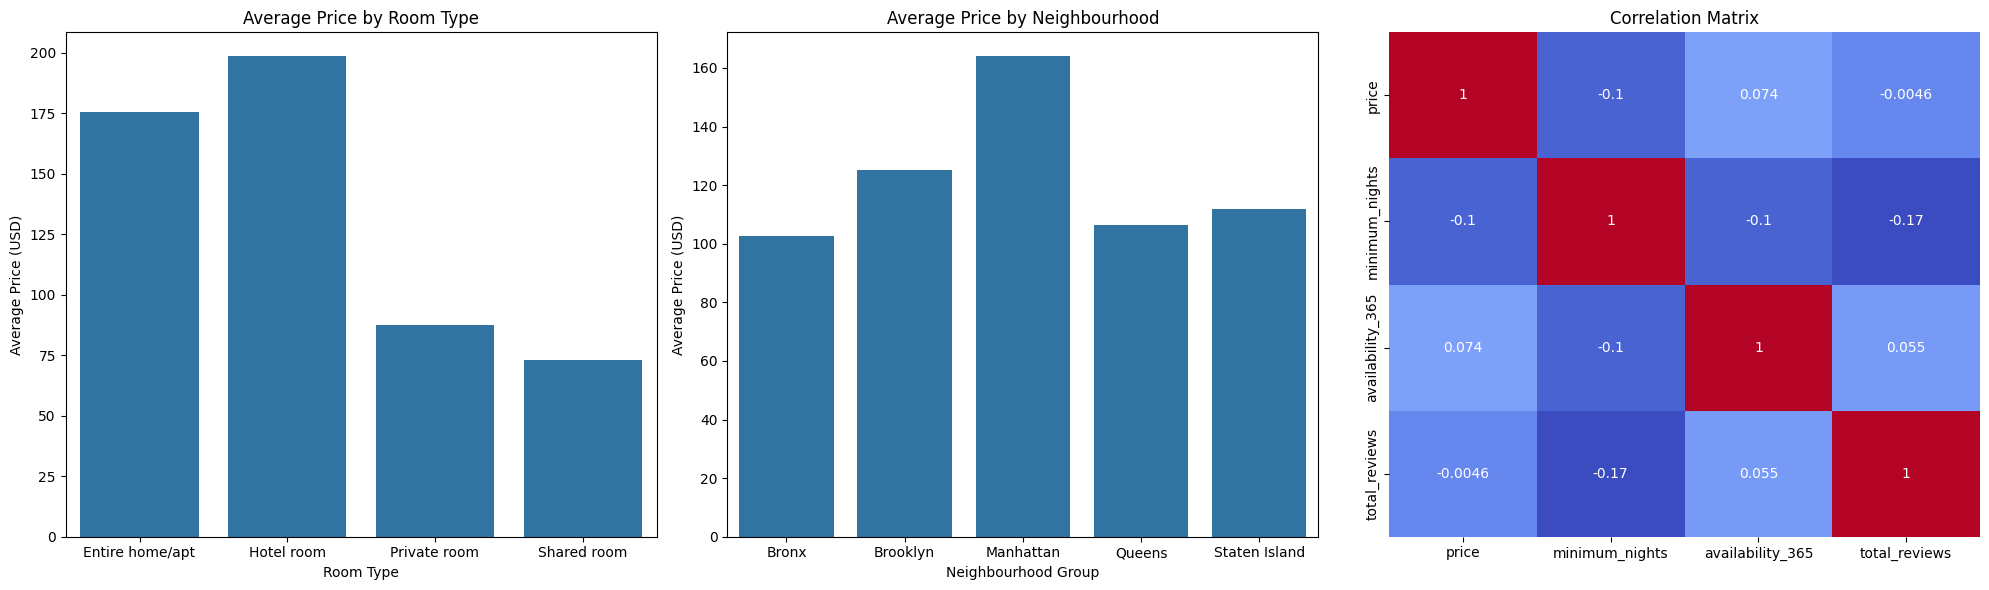

In [288]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1 - Average Price by Room Type
price_by_room_type = df.groupby("room_type").agg(avg_price=("price", "mean")).reset_index()
sns.barplot(x="room_type", y="avg_price", data=price_by_room_type, ax=axes[0])
axes[0].set_title("Average Price by Room Type")
axes[0].set_xlabel("Room Type")
axes[0].set_ylabel("Average Price (USD)")

# Plot 2 - Average Price by Neighbourhood Group
price_by_neighbourhood = df.groupby("neighbourhood_group").agg(avg_price=("price", "mean")).reset_index()
sns.barplot(x="neighbourhood_group", y="avg_price", data=price_by_neighbourhood, ax=axes[1])
axes[1].set_title("Average Price by Neighbourhood")
axes[1].set_xlabel("Neighbourhood Group")
axes[1].set_ylabel("Average Price (USD)")

# Plot 3 - Correlation Matrix
numeric_cols = ["price", "minimum_nights", "availability_365", "total_reviews"]
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axes[2], cbar=False)
axes[2].set_title("Correlation Matrix")

plt.tight_layout()
plt.show()


**Observations**
* Location is the biggest factor: Manhattan properties have the highest average nightly prices.

* Room Type Matters Most: Hotel rooms have the highest average price ($198.6), followed by entire homes/apartments ($175.3), private rooms ($87.6), and shared rooms ($72.9). However, hotel rooms make up less than 1% of listings, so their high average is skewed by a small number of luxury properties.

* Reviews and ratings also influence pricing, as highly-rated and frequently-reviewed listings maintain higher price points.

---

## **Conclusion:**
Airbnb prices in NYC are primarily influenced by room type and location. While hotel rooms appear most expensive on average, their rarity makes entire homes/apartments the real premium category in practice. Manhattan properties command the highest prices due to demand and centrality.

## **Business Recommendation:**
**For Hosts:** Focus on offering entire homes/apartments in high-demand Manhattan and Brooklyn neighborhoods for maximum earnings.

**For Airbnb Platform:** Highlight budget-friendly options in outer boroughs to attract price-sensitive travelers.

**For New Hosts:** Instead of competing in saturated areas like Midtown, target affordable but rising neighborhoods (e.g., Queens) where competition is low but visitor interest is growing.

---
---

## Ideal Host Locations
#### Which areas in NYC would be ideal for a host to purchase property—offering good pricing while attracting high guest traffic?  

In [289]:
neighbourhood_stats = df.groupby("neighbourhood").agg(listings_count=("id","count"), unique_hosts_count=("host_id","nunique"), average_price=("price","mean"), average_reviews_per_month=("reviews_per_month","mean"), average_availability=("availability_365","mean")).reset_index()
neighbourhood_stats["competition"] = neighbourhood_stats["listings_count"] / neighbourhood_stats["unique_hosts_count"].replace(0,1)
neighbourhood_stats["competition_inverse"] = 1 / neighbourhood_stats["competition"]

In [290]:
def rescale_series(series): 
    if series.max() - series.min() == 0: 
        return series*0+50 
    return (series - series.min()) / (series.max() - series.min()) * 100

In [291]:
neighbourhood_stats["price_score"] = rescale_series(neighbourhood_stats["average_price"])
neighbourhood_stats["demand_score"] = rescale_series(neighbourhood_stats["average_reviews_per_month"])
neighbourhood_stats["competition_score"] = rescale_series(neighbourhood_stats["competition_inverse"])
neighbourhood_stats["opportunity_score"] = (neighbourhood_stats["price_score"] + neighbourhood_stats["demand_score"] + neighbourhood_stats["competition_score"]) / 3
top_neighbourhoods = neighbourhood_stats.sort_values("opportunity_score", ascending=False).head(20)
neighbourhood_stats.head()

,neighbourhood,listings_count,unique_hosts_count,average_price,average_reviews_per_month,average_availability,competition,competition_inverse,price_score,demand_score,competition_score,opportunity_score
0,Allerton,51,39,106.705882,1.581569,223.725490,1.307692,0.764706,23.081620,54.963289,68.627451,48.890787
1,Arden Heights,4,4,89.750000,1.827500,355.500000,1.000000,1.000000,17.214533,63.509991,100.000000,60.241508
2,Arrochar,14,11,129.214286,1.311429,188.500000,1.272727,0.785714,30.869995,45.575276,71.428571,49.291281
3,Arverne,105,79,138.247619,1.368667,198.438095,1.329114,0.752381,33.995716,47.564437,66.984127,49.514760
4,Astoria,750,540,102.685333,1.194720,131.258667,1.388889,0.720000,21.690427,41.519374,62.666667,41.958823


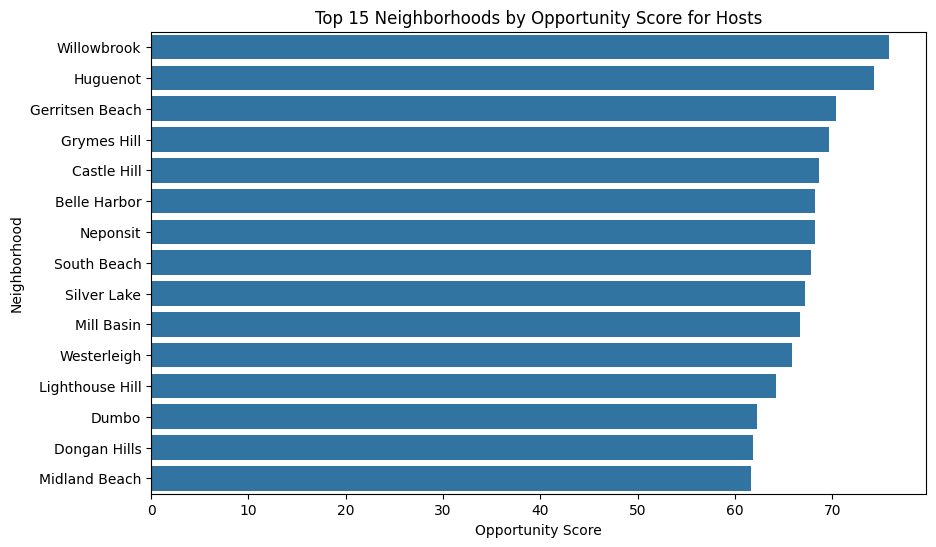

In [292]:
plt.figure(figsize=(10,6))
sns.barplot(x="opportunity_score", y="neighbourhood", data=top_neighbourhoods.head(15))
plt.title("Top 15 Neighborhoods by Opportunity Score for Hosts")
plt.xlabel("Opportunity Score")
plt.ylabel("Neighborhood")
plt.show()

**Observations:**
* Staten Island neighborhoods like Willowbrook, Huguenot, and Grymes Hill appear in the top “opportunity score” list, suggesting low competition but reasonable demand.

* Brooklyn’s Dumbo and Gerritsen Beach also feature, offering potential for new hosts outside the usual crowded markets.

* These areas are not the top tourist hotspots but represent untapped markets with growth potential.

---

## **Conclusion:**
While Manhattan and Williamsburg remain Airbnb’s most popular zones overall, the highest host opportunities exist in less saturated neighborhoods (mostly in Staten Island, parts of Brooklyn, and Queens).

## **Business Recommendation:**

* **New Hosts:** Target these less competitive neighborhoods to gain visibility quickly.

* **Experienced Hosts:** Can still profit in Manhattan/Williamsburg, but must differentiate with premium offerings.

* **Airbnb Platform:** Should market Staten Island and Queens as “hidden gems” to balance demand across NYC.

---

---

## Length of Stay Analysis
#### How do the typical lengths of stay for Airbnb rentals vary by neighborhood? Do some neighborhoods tend to attract longer or shorter bookings?  

In [293]:
stay_neighbourhood_group = df.groupby("neighbourhood_group").minimum_nights.agg(avg_min=("mean"), count=("count")).reset_index()
stay_neighbourhood_group

,neighbourhood_group,avg_min,count
0,Bronx,9.904877,1661
1,Brooklyn,18.150908,15526
2,Manhattan,21.368707,15275
3,Queens,14.044612,6747
4,Staten Island,10.503632,413


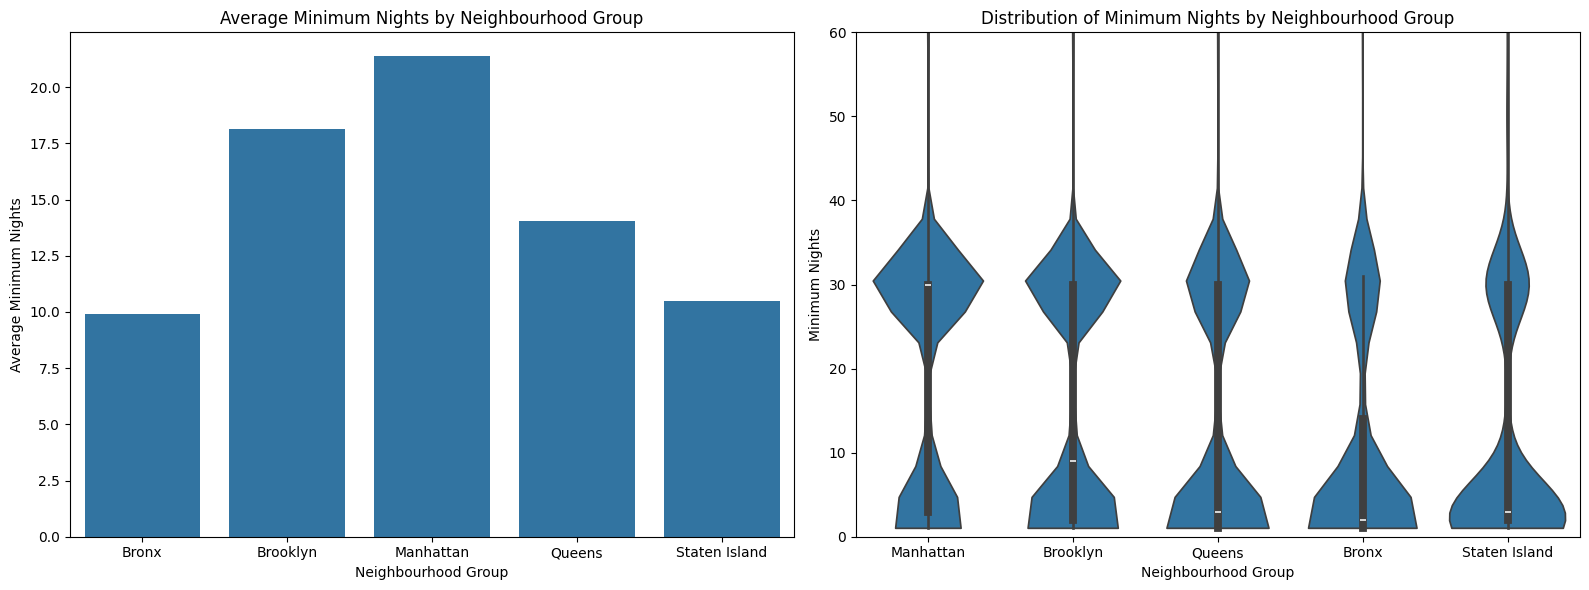

In [294]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1 - Average Minimum Nights by Neighbourhood Group
sns.barplot(x="neighbourhood_group", y="avg_min", data=stay_neighbourhood_group, ax=axes[0])
axes[0].set_title("Average Minimum Nights by Neighbourhood Group")
axes[0].set_xlabel("Neighbourhood Group")
axes[0].set_ylabel("Average Minimum Nights")

# Plot 2 - Distribution of Minimum Nights (Violin Plot)
sns.violinplot(x="neighbourhood_group", y="minimum_nights", data=df, ax=axes[1], cut=0)
axes[1].set_title("Distribution of Minimum Nights by Neighbourhood Group")
axes[1].set_xlabel("Neighbourhood Group")
axes[1].set_ylabel("Minimum Nights")
axes[1].set_ylim(0, 60)  # cap to reduce distortion from extreme outliers

plt.tight_layout()
plt.show()

**Observations**

* Most listings across all boroughs allow **very short stays (1–5 nights)**, shown by the dense lower section of the violins.  

* **Manhattan** has the highest average minimum nights, but the violin shows a long tail of extreme values, meaning many hosts require long-term stays.  

* **Brooklyn and Queens** have mixed distributions, with a majority allowing short stays but also some long-term requirements.  

* **Bronx and Staten Island** mostly favor short stays, with fewer extreme outliers compared to Manhattan and Brooklyn.  

* The violins confirm that **averages alone are misleading** because they are heavily skewed by a small number of extreme values.

---

## **Conclusion:**
Minimum night requirements in New York City Airbnb listings are highly skewed.  
While averages suggest long minimum stays, the distribution reveals that **most hosts allow very short bookings**. Manhattan stands out as the borough with the most long-term stay requirements, while Bronx and Staten Island lean strongly towards short-term stays.  

## **Business Recommendation:**

* **For hosts:** Setting more flexible minimum night policies (e.g., 2–5 nights) may attract more bookings, especially in boroughs with lower demand (Bronx, Staten Island).  

* **For guests:** Travelers looking for **short, flexible stays** will find the best options in Bronx, Staten Island, and Queens, while **long-term renters** should focus on Manhattan.

* **For Airbnb platform strategy:** It may be beneficial to **flag extreme outlier listings** (with unrealistically high minimum nights) to improve overall market transparency.  

---

---

## Reviews by Neighborhood Group
#### Determine the total number of reviews and the maximum reviews for each neighborhood group.  

In [295]:
rev_group = df.groupby("neighbourhood_group").agg(number_of_review=("total_reviews", "sum"), max_reviews=("total_reviews", "max"), listings=("id", "count")).reset_index()

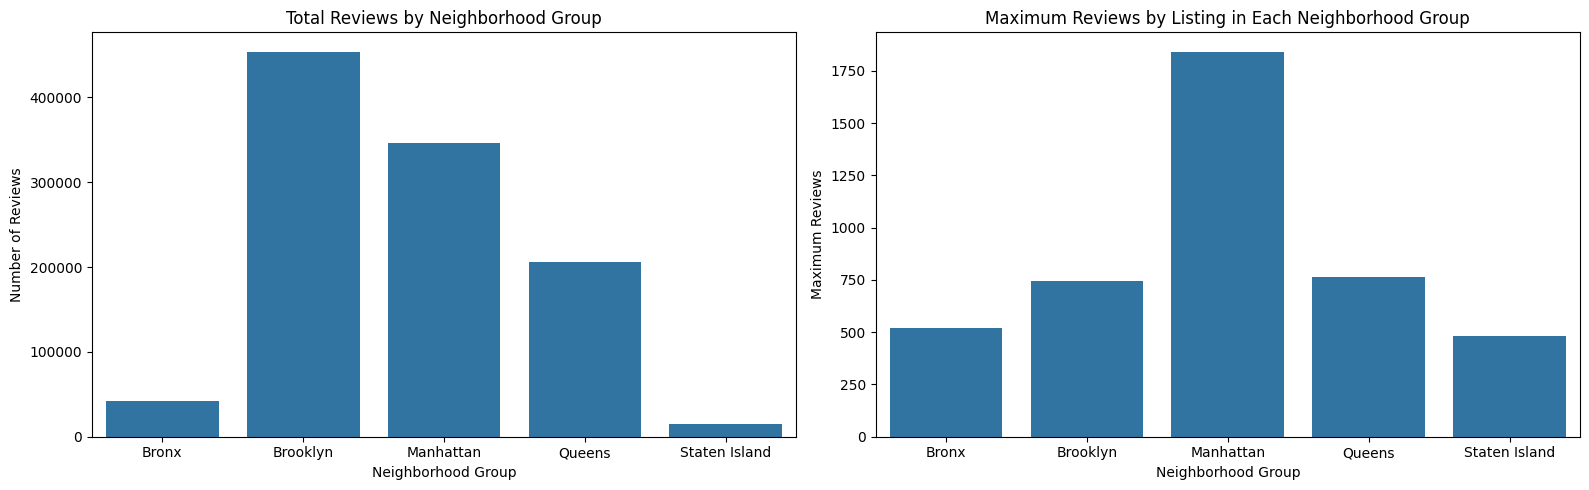

In [296]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))  # 1 row, 2 columns

# First plot - Total reviews
sns.barplot(x="neighbourhood_group", y="number_of_review", data=rev_group, ax=axes[0])
axes[0].set_title("Total Reviews by Neighborhood Group")
axes[0].set_xlabel("Neighborhood Group")
axes[0].set_ylabel("Number of Reviews")

# Second plot - Maximum reviews
sns.barplot(x="neighbourhood_group", y="max_reviews", data=rev_group, ax=axes[1])
axes[1].set_title("Maximum Reviews by Listing in Each Neighborhood Group")
axes[1].set_xlabel("Neighborhood Group")
axes[1].set_ylabel("Maximum Reviews")

plt.tight_layout()
plt.show()

**Observations**
* Brooklyn has the highest total number of reviews, indicating it attracts a large guest base with frequent review activity.

* Manhattan, although second in total reviews, shows the highest single-listing review count, suggesting that individual properties here can achieve very high visibility and guest traffic.

* Queens and Bronx show moderate performance in both total and maximum reviews, reflecting stable but smaller market activity.

* Staten Island remains the lowest in both total and maximum reviews, highlighting limited market demand and engagement.

---

## **Conclusion:**

Brooklyn dominates in overall guest engagement through high total reviews, but Manhattan demonstrates the potential for individual properties to achieve exceptional visibility and popularity. This shows two types of opportunities: broad engagement in Brooklyn versus high individual listing success in Manhattan.

## **Business Recommendation**

* **Brooklyn hosts:** Maintain momentum by encouraging repeat reviews and leveraging the large guest base. Highlight community-driven experiences to keep engagement high.

* **Manhattan hosts:** Focus on premium property branding — since top listings here attract very high guest attention, investing in quality, uniqueness, and luxury appeal can maximize review and revenue potential.

* **Queens & Bronx hosts:** Improve competitiveness by offering value-for-money stays, better amenities, or niche experiences to gradually increase review counts.

* **Staten Island hosts:** Consider targeting specialized markets (e.g., long-term stays, peaceful getaways) to differentiate and improve visibility in a low-demand area.

---

---

## Most Reviewed Room Types  
#### Identify the most-reviewed room types in each neighborhood group on a monthly basis.  

In [297]:
grouped = df_reviewed.groupby(["neighbourhood_group", "year_month", "room_type"])["total_reviews"].sum().reset_index()
pivot = grouped.pivot_table(index=["neighbourhood_group", "year_month"],columns="room_type",values="total_reviews",fill_value=0).reset_index()
pivot["top_room_type"] = pivot[["Entire home/apt", "Hotel room", "Private room", "Shared room"]].idxmax(axis=1)
pivot_sample = pivot.groupby("neighbourhood_group").head(12)
pivot_sample

room_type,neighbourhood_group,year_month,Entire home/apt,Hotel room,Private room,Shared room,top_room_type
0,Bronx,2013-12,0.0,0.0,17.0,0.0,Private room
1,Bronx,2014-08,1.0,0.0,0.0,0.0,Entire home/apt
2,Bronx,2015-01,1.0,0.0,0.0,0.0,Entire home/apt
3,Bronx,2015-02,0.0,0.0,2.0,0.0,Private room
4,Bronx,2015-08,3.0,0.0,0.0,0.0,Entire home/apt
5,Bronx,2015-10,0.0,0.0,10.0,0.0,Private room
6,Bronx,2016-03,0.0,0.0,11.0,0.0,Private room
7,Bronx,2016-06,0.0,0.0,2.0,0.0,Private room
8,Bronx,2016-07,7.0,0.0,0.0,0.0,Entire home/apt
9,Bronx,2016-09,0.0,0.0,1.0,0.0,Private room


**Observations:**
* In Bronx, the top-reviewed category alternates mainly between Private rooms and Entire homes/apts.

* In Brooklyn, a similar pattern is seen, but Entire homes/apts appear more consistently in early years, while Private rooms dominate later months.

* Hotel rooms and Shared rooms rarely show up as the top choice, indicating very limited preference.

---

## **Conclusion**

Guest preferences in Bronx and Brooklyn are split mainly between private rooms and entire homes/apartments. Private rooms dominate because they are affordable and attract budget-conscious travelers, while entire homes/apartments appeal to families or groups seeking privacy and space. Hotel rooms and shared rooms contribute very little to guest activity, showing minimal demand in these areas.

## **Business Recommendation**

Hosts in Bronx and Brooklyn should focus on offering private rooms and entire homes/apartments, since these are consistently in demand. Private room hosts should highlight affordability, cleanliness, and accessibility, while entire home/apt hosts should market to families and longer-term tourists with attractive pricing options. Hotel and shared room hosts need to rethink their strategy, as demand is too low unless they provide a very unique offering.

---
---

## Best Locations for Travelers
#### Which neighborhoods in NYC offer the best value for travelers based on affordability and overall guest satisfaction?

In [298]:

neighbourhood_scores = df.groupby("neighbourhood").agg(median_price=("price", "median"),avg_reviews=("reviews_per_month", "mean"),avg_availability=("availability_365", "mean"),listings=("id", "count")).reset_index()

neighbourhood_scores["price_inverse"] = neighbourhood_scores["median_price"].max() - neighbourhood_scores["median_price"]

def normalize(series):
    if series.max() - series.min() == 0:
        return series * 0 + 50
    return (series - series.min()) / (series.max() - series.min()) * 100

neighbourhood_scores["price_score"] = normalize(neighbourhood_scores["price_inverse"])
neighbourhood_scores["demand_score"] = normalize(neighbourhood_scores["avg_reviews"])
neighbourhood_scores["availability_score"] = normalize(neighbourhood_scores["avg_availability"])

neighbourhood_scores["value_score_for_travelers"] = (neighbourhood_scores["price_score"] +neighbourhood_scores["demand_score"] +neighbourhood_scores["availability_score"]) / 3

top_neighbourhoods_for_travelers = neighbourhood_scores.sort_values("value_score_for_travelers", ascending=False).head(20)




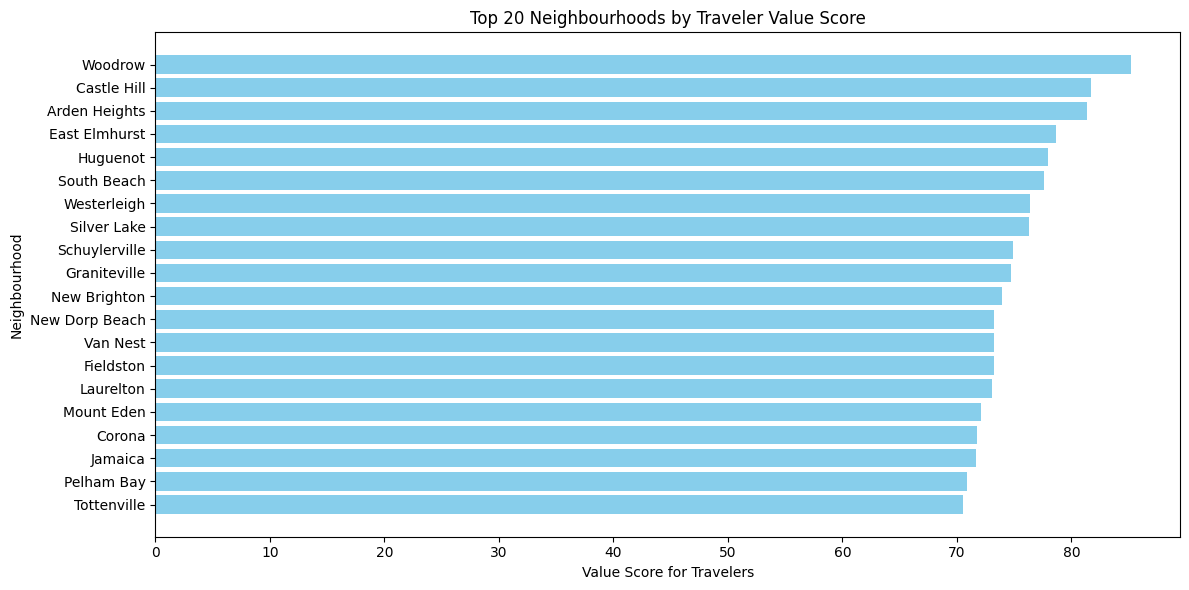

In [299]:

plt.figure(figsize=(12, 6))
plt.barh(top_neighbourhoods_for_travelers["neighbourhood"],top_neighbourhoods_for_travelers["value_score_for_travelers"],color="skyblue")

plt.gca().invert_yaxis()
plt.xlabel("Value Score for Travelers")
plt.ylabel("Neighbourhood")
plt.title("Top 20 Neighbourhoods by Traveler Value Score")
plt.tight_layout()
plt.show()


**Observations:**
* Neighborhoods such as Woodrow, Castle Hill, and Arden Heights rank highest in terms of value score. These areas, along with others in Staten Island, Bronx, and Queens, consistently offer affordable prices combined with positive guest experiences.

---

## **Conclusion**

The analysis shows that travelers seeking budget-friendly stays with good guest satisfaction are more likely to find better value outside Manhattan and Brooklyn. While these areas may not be traditional tourist hotspots, they appeal strongly to cost-conscious travelers and long-term visitors.

## **Business Recommendation**

Hosts in Staten Island, Bronx, and Queens should highlight affordability, larger space, and local neighborhood charm when marketing their listings. Offering competitive pricing and amenities (Wi-Fi, kitchen access, weekly/monthly discounts) can attract travelers looking for value over location. Additionally, local tourism boards could promote these neighborhoods as budget-friendly alternatives to Manhattan for extended stays.

---
---

## Best Locations for Hosts
#### Which neighborhoods in New York City are the most profitable for Airbnb hosts?

In [300]:
host_rank = neighbourhood_stats.sort_values("opportunity_score", ascending=False).head(20)


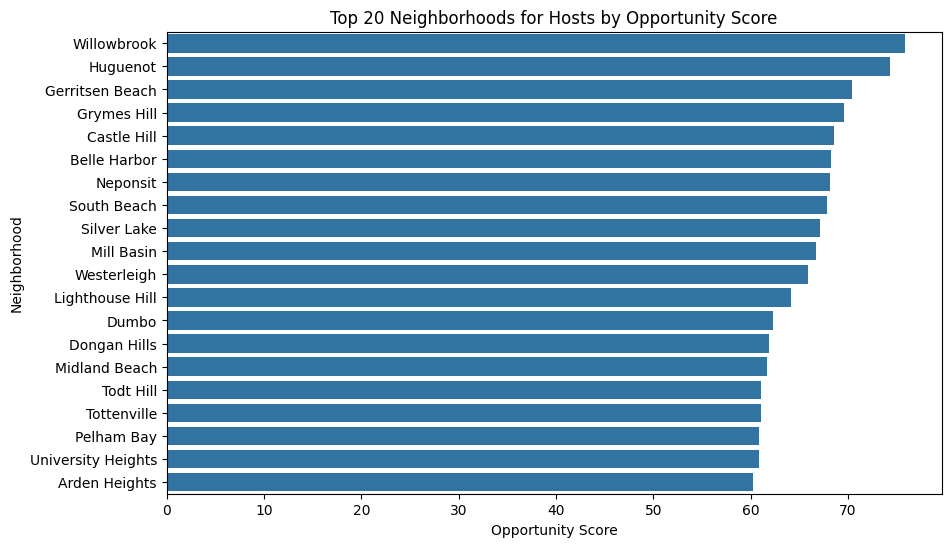

In [301]:
plt.figure(figsize=(10,6))
sns.barplot(x="opportunity_score", y="neighbourhood", data=host_rank)
plt.title("Top 20 Neighborhoods for Hosts by Opportunity Score")
plt.xlabel("Opportunity Score")
plt.ylabel("Neighborhood")
plt.show()

**Observations:**

* Willowbrook, Huguenot, and Gerritsen Beach stand out with high average earnings despite being outside the main tourist hotspots.

* Grymes Hill and Castle Hill also perform well, showing strong profitability driven by niche demand and limited competition.

* Staten Island neighborhoods such as Willowbrook, South Beach, and Silver Lake are notable examples where hosts benefit from less saturation.

* Brooklyn’s Gerritsen Beach and Dumbo provide profitable opportunities, with Dumbo leveraging its cultural appeal and proximity to Manhattan.

* Profitability is not strictly tied to tourist volume but rather to the balance of pricing, occupancy, and host competition.

---

## **Conclusion**

The most profitable neighborhoods for Airbnb hosts are not always the busiest tourist areas. Outer-borough locations in Staten Island, select Brooklyn areas, and parts of Queens often deliver stronger returns due to higher pricing power and reduced competition.

## **Business Recommendation**

Hosts should consider targeting neighborhoods such as Willowbrook, Neponsit, and Lighthouse Hill for premium or family-oriented stays.

Castle Hill, Grymes Hill, and Pelham Bay are better suited for longer stays and repeat guests due to stable demand.

Dumbo can be marketed to younger travelers and professionals who seek cultural experiences and accessibility to Manhattan.

Overall, profitability increases when hosts align their pricing and marketing with the strengths of each neighborhood rather than chasing only high-tourist zones.

---
---

## Price Variations by Neighborhood
#### Analyze price variations across different NYC neighborhood groups.  

In [302]:
price_var = df.groupby("neighbourhood_group")["price"].agg(median="median",q1=lambda x: x.quantile(0.25),q3=lambda x: x.quantile(0.75),mean="mean",count="count").reset_index()
price_var

,neighbourhood_group,median,q1,q3,mean,count
0,Bronx,85.0,57.0,129.0,102.626129,1661
1,Brooklyn,105.0,65.0,166.0,124.997617,15526
2,Manhattan,150.0,99.0,219.0,163.945270,15275
3,Queens,89.0,56.0,138.0,106.250926,6747
4,Staten Island,99.0,70.0,130.0,111.929782,413


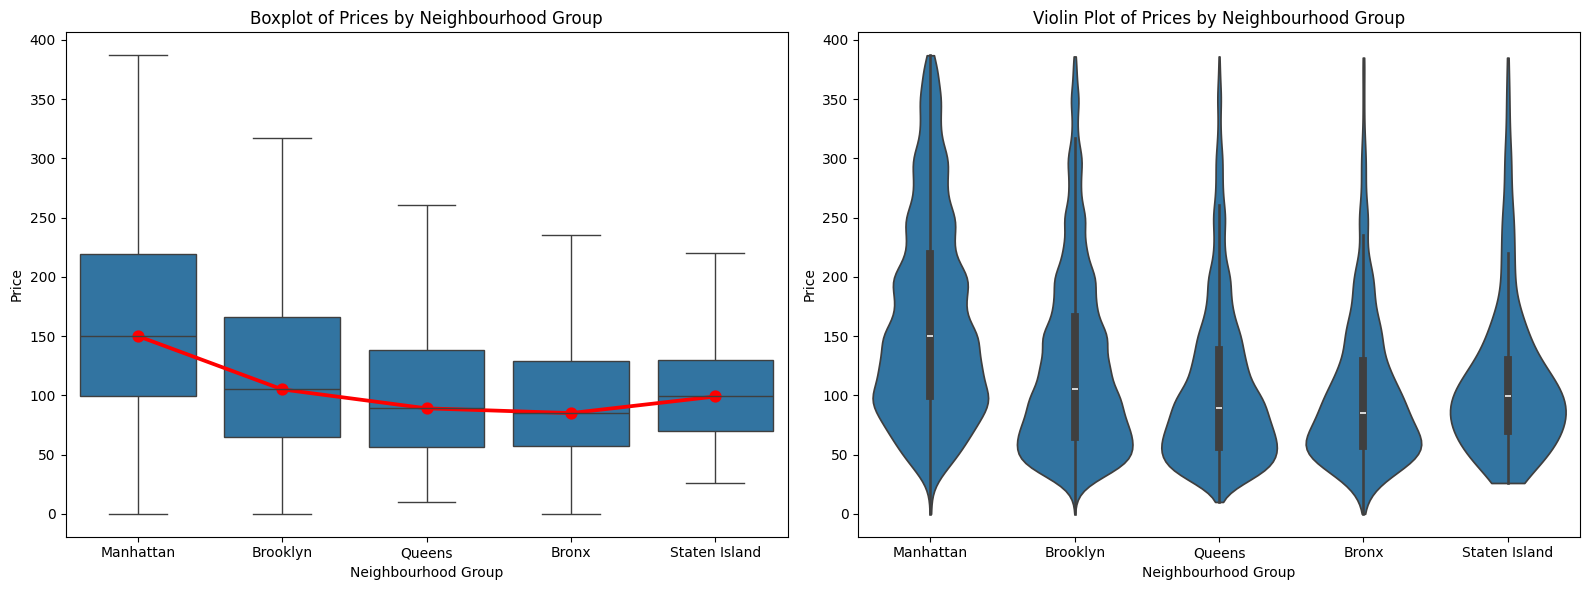

In [303]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.boxplot(x="neighbourhood_group", y="price", data=df, ax=axes[0], showfliers=False)
sns.pointplot(x="neighbourhood_group", y="price", data=df, estimator=np.median, color="red", ci=None, ax=axes[0])
axes[0].set_title("Boxplot of Prices by Neighbourhood Group")
axes[0].set_ylabel("Price")
axes[0].set_xlabel("Neighbourhood Group")

sns.violinplot(x="neighbourhood_group", y="price", data=df, cut=0, scale="width", ax=axes[1])
axes[1].set_title("Violin Plot of Prices by Neighbourhood Group")
axes[1].set_ylabel("Price")
axes[1].set_xlabel("Neighbourhood Group")

plt.tight_layout()
plt.show()

**Observations:**

* Manhattan has the highest median ($150) and mean ($165) prices, with a wide spread of values — showing both luxury and budget options but still the costliest overall.

* Brooklyn is the second most expensive (median $105, mean $125), though slightly more affordable than Manhattan and still a major hub.

* Queens, Bronx, and Staten Island have much lower median and mean prices (≈ $85–$100), showing more budget-friendly options for travelers.

* The boxplot highlights that Manhattan listings have the widest price spread, while Bronx and Staten Island show tighter clustering.

* The violin plot emphasizes that Manhattan and Brooklyn distributions are skewed upward, while Bronx, Queens, and Staten Island are more balanced and concentrated around lower prices.

---

## **Conclusion:**
Airbnb prices in NYC vary significantly across neighborhood groups. Manhattan and Brooklyn dominate the higher end of the market, while Queens, Bronx, and Staten Island offer more affordable alternatives. Price differences align with demand and prestige of the location, but travelers with tighter budgets clearly lean toward outer boroughs.

## **Business Recommendation:**
* **Hosts in Manhattan and Brooklyn:** Highlight premium experiences, unique amenities, and location advantages to justify higher prices. Luxury positioning works well here.

* **Hosts in Queens, Bronx, and Staten Island:** Compete on affordability and value — market toward budget travelers, students, and long-stay guests. Emphasize accessibility (proximity to subway, airports) and safety to stand out.

* **Platform (Airbnb):** Recommend promoting outer-borough listings to cost-conscious travelers and balancing visibility so that budget options aren’t overshadowed by Manhattan’s dominance.

---
---

## Price Variations by Neighborhood
#### Analyze price variations across different NYC neighborhood groups.  

#### **Null and Alternative Hypothesis**

* **Null Hypothesis (H₀):** The mean price of Airbnb listings is equal across all neighborhood groups in New York City.

* **Alternative Hypothesis (H₁):** At least one neighborhood group has a significantly different mean price compared to the others.

#### **Assumptions of ANOVA**

* Independence of observations – Each listing’s price is independent of the others.

* Normality – Prices within each group should be approximately normally distributed. (Airbnb price data usually violates this due to extreme outliers.)

* Homogeneity of variance – Variances across neighborhood groups should be roughly equal.

#### **Note on ANOVA Assumptions**

Although the normality assumption is not strictly met due to the skewed distribution of Airbnb prices, ANOVA is generally robust with large sample sizes thanks to the Central Limit Theorem. Therefore, the results remain meaningful.

In [304]:
groups = [df[df["neighbourhood_group"]==g]["price"].values for g in df["neighbourhood_group"].dropna().unique()]
anova_res = st.f_oneway(*groups)
anova_res

F_onewayResult(statistic=919.4890334756898, pvalue=0.0)

#### **Why the p-value is 0**

The F-statistic is extremely large (919.49), which indicates that the variation in mean prices between groups is far greater than the variation within groups.

This leads to a p-value so small that Python reports it as 0.0 (actually it’s smaller than machine precision, e.g. < 1e-300).

This means the differences in average prices across neighborhood groups are highly statistically significant.

**Observations:**

* Mean prices vary drastically across neighborhood groups.

* The between-group variation dominates the within-group variation, leading to strong evidence against the null hypothesis.

* Outliers (like extremely expensive Manhattan listings) may amplify the variance differences and increase the F-statistic.

---
#### **Conclusion:**

Since the p-value is effectively zero, we reject the null hypothesis. This means there is strong evidence that the average Airbnb price is not the same across all neighborhood groups in New York City.

---
---

## Room Type Price Differences
Do entire home/apartment listings have significantly higher prices than private rooms and shared rooms?  

#### **Null and Alternative Hypothesis (ANOVA)**

* Null Hypothesis (H₀): The mean price of Airbnb listings is equal across all room types.

* Alternative Hypothesis (H₁): At least one room type has a significantly different mean price compared to the others.

#### **Assumptions of ANOVA**

* Independence of observations – Each listing’s price is independent.

* Normality – Prices within each room type should be approximately normally distributed (not always true due to outliers).

* Homogeneity of variance – Variance in prices should be similar across room types.

In [305]:
groups_room = [df[df["room_type"]==r]["price"].values for r in df["room_type"].dropna().unique()]
anova_room = st.f_oneway(*groups_room)
anova_room

F_onewayResult(statistic=5611.425659159923, pvalue=0.0)

> **ANOVA Result**  
> The ANOVA test shows a very large F-statistic with a p-value close to 0. This means the mean prices differ significantly across room types.


#### **Null and Alternative Hypotheses (t-test: Entire home/apt vs. Private room)**

* **Null Hypothesis (H₀):** The mean price of Entire home/apartment listings is equal to the mean price of Private room listings.  

* **Alternative Hypothesis (H₁):** The mean price of Entire home/apartment listings is different from the mean price of Private room listings.  


In [306]:
entire_prices = df[df["room_type"]=="Entire home/apt"]["price"].values
private_prices = df[df["room_type"]=="Private room"]["price"].values
t_entire_private = st.ttest_ind(entire_prices, private_prices,  equal_var=False, nan_policy="omit")
t_entire_private

TtestResult(statistic=131.23301557008503, pvalue=0.0, df=38825.325341925476)

> **Pairwise Comparison (Entire home/apt vs. Private room)**  
> A two-sample t-test (Welch’s test) was performed between Entire home/apt and Private room. The result shows a large test statistic with a p-value close to 0, indicating that > the mean price of Entire home/apt listings is significantly higher than that of Private rooms.


#### **Null and Alternative Hypotheses (t-test: Entire home/apt vs. Shared room)**

* **Null Hypothesis (H₀):** The mean price of Entire home/apartment listings is equal to the mean price of Shared room listings.  

* **Alternative Hypothesis (H₁):** The mean price of Entire home/apartment listings is different from the mean price of Shared room listings.  


In [307]:
shared_prices = df[df["room_type"]=="Shared room"]["price"].values
t_entire_shared = st.ttest_ind(entire_prices, shared_prices, equal_var=False, nan_policy="omit")
t_entire_shared

TtestResult(statistic=42.99909790776854, pvalue=1.5129113085509561e-186, df=608.1369720695734)



>**Pairwise Comparison (Entire home/apt vs. Shared room)**  
A two-sample t-test (Welch’s test) was performed between Entire home/apt and Shared room. The result shows a very large test statistic with a p-value close to 0, indicating that Entire home/apt listings are significantly more expensive than Shared rooms.


**Observations:**

* The statistical tests confirm that room type strongly influences pricing.  
* Entire homes/apartments are priced significantly higher than both private rooms and shared rooms.  
* This pattern aligns with guest expectations: entire homes offer greater space and privacy, while private and shared rooms are budget-friendly options for cost-conscious travelers.  


---

## **Conclusion**
The null hypothesis is rejected. Room type has a significant effect on Airbnb pricing.  
Entire homes/apartments command much higher prices compared to both private rooms and shared rooms, confirming that accommodation type is a key determinant of price differences.

---
---

## Review Activity Differences
Do the number of reviews per month significantly differ across neighborhood groups?  

#### **Null and Alternative Hypothesis**

* Null Hypothesis (H₀): The mean number of monthly reviews is equal across all boroughs.

* Alternative Hypothesis (H₁): At least one borough has a significantly different mean monthly review activity.

#### **Assumptions of ANOVA**

* Independence – Reviews for one listing are independent of another.

* Normality – Review counts per borough are approximately normally distributed (though skewness/outliers may exist).

* Homogeneity of variance – Variance of reviews per month is similar across boroughs

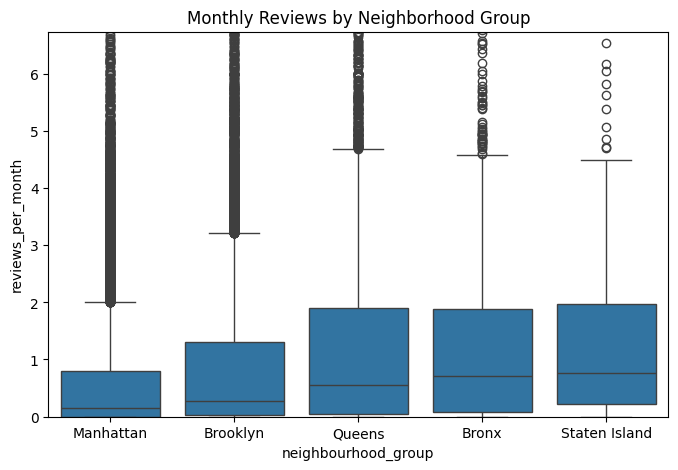

(F_onewayResult(statistic=141.81064056644604, pvalue=1.4010398915048243e-120),
   neighbourhood_group  reviews_per_month
 0               Bronx           1.219922
 1            Brooklyn           0.909295
 2           Manhattan           0.725528
 3              Queens           1.252518
 4       Staten Island           1.312930)

In [308]:
reviews_by_group = [df[df["neighbourhood_group"] == group]["reviews_per_month"].values for group in df["neighbourhood_group"].dropna().unique()]

anova_reviews = st.f_oneway(*reviews_by_group)

reviews_means = (df.groupby("neighbourhood_group")["reviews_per_month"].mean().reset_index())

plt.figure(figsize=(8, 5))
sns.boxplot(x="neighbourhood_group", y="reviews_per_month", data=df)
plt.title("Monthly Reviews by Neighborhood Group")
plt.ylim(0, df["reviews_per_month"].quantile(0.99) + 0.5)
plt.show()

anova_reviews, reviews_means


**ANOVA Result**

The ANOVA test produced a very large F-statistic with a p-value extremely close to 0. This indicates that mean monthly reviews differ significantly across boroughs.

**Group Means**

* Bronx: 1.22 reviews/month

* Brooklyn: 0.91 reviews/month

* Manhattan: 0.73 reviews/month

* Queens: 1.25 reviews/month

* Staten Island: 1.31 reviews/month

**Observstions:**

* Queens and Staten Island have the highest guest activity in terms of monthly reviews, followed closely by the Bronx. Brooklyn has moderate review activity, while Manhattan—despite its popularity in terms of listings and guests—shows the lowest average review activity.

---
## **Conclusion**
The null hypothesis is rejected. Review activity is not evenly distributed across boroughs. Manhattan underperforms in guest review activity compared to outer boroughs, which suggests differences in guest engagement, stay types, or host practices.

---
---

#  **Final Conclusion**

- **Market Concentration**  
  - Manhattan and Brooklyn dominate the Airbnb market in terms of listings and pricing.  
  - These boroughs attract the majority of guests due to central location and attractions.  
  - Competition is intense and prices are significantly higher compared to other areas.  

- **Affordability in Outer Boroughs**  
  - Queens, the Bronx, and Staten Island provide more budget-friendly stays.  
  - Greater availability and flexibility in booking make them appealing for long-term or cost-conscious travelers.  

- **Property Type Insights**  
  - Entire homes/apartments command the highest prices and attract families or groups.  
  - Private rooms serve as a balanced, affordable option for solo travelers or pairs.  
  - Shared spaces remain a niche market with limited supply and demand.  

- **Statistical Validation**  
  - Price variations across both areas and property types are statistically significant.  
  - Confirms that location and property category are the strongest drivers of pricing.  

- **Market Evolution Over Time**  
  - The number of listings has steadily grown in recent years.  
  - Prices show an upward trend alongside increasing demand.  
  - Review patterns suggest evolving traveler preferences and booking behavior.  

- **Minimum-Stay Policies**  
  - Central boroughs often enforce stricter minimum-night requirements to maximize income.  
  - Outer boroughs offer more flexible booking policies, allowing wider guest options.  

- **Availability Patterns**  
  - Properties available all year are not always in high demand.  
  - Listings with fewer available days but frequent reviews indicate strong occupancy.  

- **Opportunities for Hosts**  
  - High-demand neighborhoods with moderate competition are promising for new hosts.  
  - Outer boroughs offer growth potential with less saturation.  

- **Value for Travelers**  
  - Guests can find better deals in neighborhoods outside the central boroughs.  
  - These areas balance affordability, availability, and accessibility.  

- **Overall Market Insight**  
  - The NYC Airbnb market is competitive, segmented, and shaped by trade-offs between price, demand, and location.  
  - Success for both hosts and guests depends on choosing the right balance of affordability, availability, and visibility.  


## **Executive Summary**

This analysis of Airbnb NYC 2023 data provides insights into pricing, availability, and neighborhood trends that matter to both hosts and travelers.

### Key Insights
1. **Neighborhood dominance**  
   - Manhattan and Brooklyn together account for ~85% of listings.  
   - Manhattan commands the highest average prices, while Brooklyn offers more affordable options with strong availability.

2. **Pricing patterns**  
   - Most listings fall under \$300, but extreme outliers (> \$1,000/night) exist and distort averages.  
   - Budget-friendly travelers are more likely to find value in Queens and Brooklyn.

3. **Availability trends**  
   - Many listings are available year-round (365 days), while others show zero availability — suggesting inactive or seasonal hosts.  
   - Median availability differs by borough, highlighting varied hosting strategies.

4. **Host dynamics**  
   - A small share of “super-hosts” manage many listings, increasing competition.  
   - Most hosts, however, operate only one property.

5. **Review behavior**  
   - Listings with higher availability and moderate pricing tend to receive more reviews.  
   - A notable portion of listings have never been reviewed, indicating inactive or new hosts.

### Business Recommendations
- **For Travelers:**  
  - Look beyond Manhattan for better value — Brooklyn and Queens offer lower prices with good accessibility.  
  - Avoid listings with no reviews or extreme prices to reduce booking risk.

- **For Hosts:**  
  - In saturated markets like Manhattan, differentiation through reviews and guest experience is crucial.  
  - Competitive pricing in Brooklyn can capture price-sensitive demand.  
  - Hosts with multiple listings should optimize availability calendars to maximize occupancy.

- **For Airbnb (Platform):**  
  - Filtering extreme outliers (e.g., \$99,000 listings) could improve user trust.  
  - Incentivizing inactive hosts to update or remove stale listings would enhance platform quality.

---

**Takeaway**: The NYC Airbnb market is vibrant but uneven. Manhattan drives visibility, Brooklyn drives affordability, and Queens represents untapped potential. Both hosts and travelers can optimize decisions by balancing price, availability, and review activity.
